In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [5]:
#fb_data = pd.read_csv('data/full_body.csv')
fb_data = pd.read_csv('data/imputed_full_body.csv')

In [6]:
inertia_values = []
silhouette_values = [0]
calinski_harabasz_values = [0]

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(fb_data)
    
    inertia_values.append(kmeans.inertia_)
    if(i > 1):
        silhouette_values.append( silhouette_score(fb_data, kmeans.labels_) )
        calinski_harabasz_values.append( calinski_harabasz_score(fb_data, kmeans.labels_) )

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

KeyboardInterrupt: 

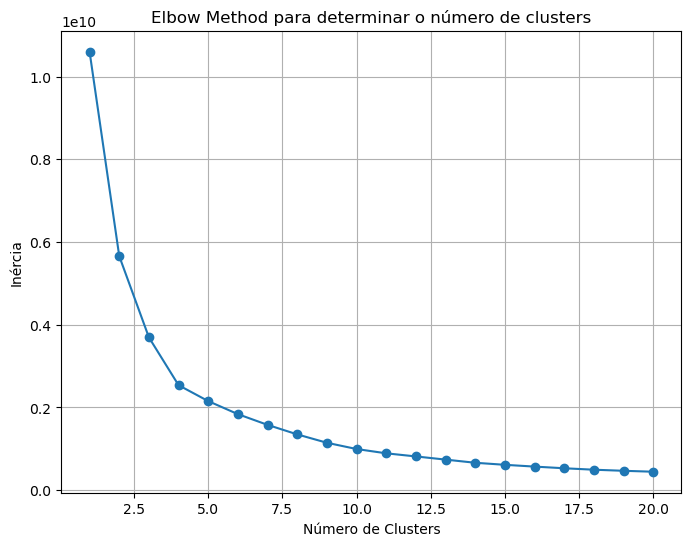

In [ ]:
# Plotar o gráfico da inércia em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), inertia_values, marker='o')
plt.grid()
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Elbow Method para determinar o número de clusters')
plt.show()

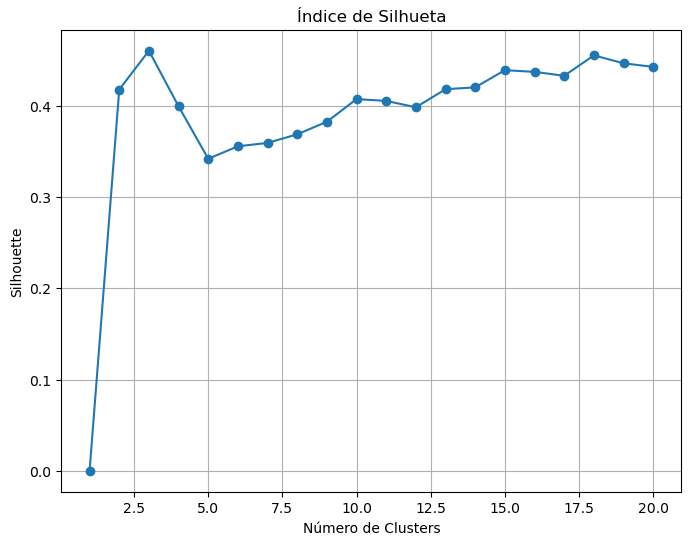

In [ ]:
# Plotar o gráfico da silhueta em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), silhouette_values, marker='o')
plt.grid()
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette')
plt.title('Índice de Silhueta')
plt.show()

In [ ]:
arr = np.array(silhouette_values)
indexed_arr = list(enumerate(arr))
sorted_arr = sorted(indexed_arr, key=lambda x: x[1], reverse=True)
for index, value in sorted_arr:
    print(f"K: {index+1}, Value: {value}")

K: 3, Value: 0.46059524939275664
K: 18, Value: 0.45550427420272604
K: 19, Value: 0.44682074107708275
K: 20, Value: 0.44287518662905406
K: 15, Value: 0.4392837979662389
K: 16, Value: 0.4374000246667876
K: 17, Value: 0.4331152582002641
K: 14, Value: 0.4204307631350734
K: 13, Value: 0.4184059530771803
K: 2, Value: 0.4180242719567132
K: 10, Value: 0.40757045665473834
K: 11, Value: 0.40552441172545234
K: 4, Value: 0.3996142760809138
K: 12, Value: 0.3985926243220925
K: 9, Value: 0.38271219945481155
K: 8, Value: 0.3689247110570483
K: 7, Value: 0.35950832738985444
K: 6, Value: 0.35576548709077865
K: 5, Value: 0.3420993582330954
K: 1, Value: 0.0


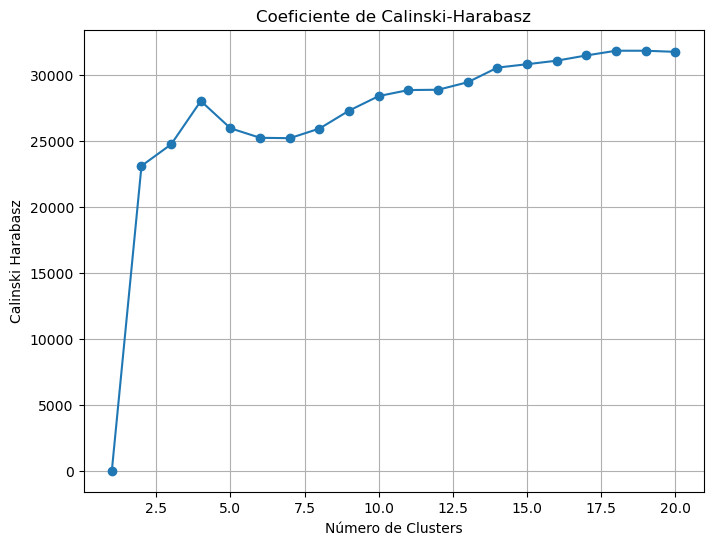

In [ ]:
# Plotar o gráfico da métrica calinski em relação ao número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), calinski_harabasz_values, marker='o')
plt.grid()
plt.xlabel('Número de Clusters')
plt.ylabel('Calinski Harabasz')
plt.title('Coeficiente de Calinski-Harabasz')
plt.show()

In [ ]:
arr = np.array(calinski_harabasz_values)
indexed_arr = list(enumerate(arr))
sorted_arr = sorted(indexed_arr, key=lambda x: x[1], reverse=True)
for index, value in sorted_arr:
    print(f"K: {index+1}, Value: {value}")

K: 18, Value: 31851.276087624126
K: 19, Value: 31850.107598718205
K: 20, Value: 31764.785999460917
K: 17, Value: 31495.51466599127
K: 16, Value: 31097.18300032381
K: 15, Value: 30827.939435496723
K: 14, Value: 30571.10999080308
K: 13, Value: 29463.00284069203
K: 12, Value: 28891.444717050188
K: 11, Value: 28867.840795017015
K: 10, Value: 28414.369250908603
K: 4, Value: 28039.68172946485
K: 9, Value: 27311.71964700063
K: 5, Value: 25968.77075132276
K: 8, Value: 25949.048441130122
K: 6, Value: 25247.451958148613
K: 7, Value: 25218.322324250086
K: 3, Value: 24752.484665332053
K: 2, Value: 23119.22482024805
K: 1, Value: 0.0
